# CMSC478 Machine Learning

# Assignment-4: Classification and Regression with Neural Networks

*Connor Ragan AN72374* 

## Overview and Learning Objectives

You have learned the fundamentals of Neural Networks and Deep Learning. You have also learned how to train them based on the techniques discussed in lectures and the contents from Chapter 10 and Chapter 11 of the textbook.

In Part I of this assignment, you are going to build a NN for classification. In Part II, you will build a NN for regression.

Pedagogically, this assignment will help you:
- better understand Neural Networks.

- practice with Tensorflow and Keras API.

- practice the skills you learned in sklearn and combine them with tf/keras to use in your project.

Notice that you should have Tensorflow version 2.0 installed and ready.

## Part I - Classification with NNs

In Part I, you are going to use neural networks for a binary classification probelm to predict heart disease. You can [download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/blob/master/Assignment-4/SAheart.csv).<br> <b>Note:</b>The data should be stored in the same working directory as your notebook.

In [79]:
# Import necessary Python and Tensorflow/keras modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [80]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


In [81]:
# load data
heart_data = pd.read_csv('SAheart.csv')
print(heart_data.shape)
heart_data.head()

(462, 11)


,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Some description about the features from [the data source](https://web.stanford.edu/~hastie/ElemStatLearn/):

> "A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in  Rousseauw et al, 1983, South African Medical Journal." 

        sbp	        systolic blood pressure
        tobacco		cumulative tobacco (kg)
        ldl		    low densiity lipoprotein cholesterol
        adiposity
        famhist		family history of heart disease (Present, Absent)
        typea		  type-A behavior
        obesity
        alcohol		current alcohol consumption
        age		    age at onset
        chd		    label, coronary heart disease

## <font color="red"> Required Coding

In [82]:
### START CODING HERE ###
# The first column, row.names is useless, drop it! ~ 1 line
heart_data = heart_data.drop('row.names', axis=1)
### END CODING HERE ###

print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [83]:
# Get the feature data types.
heart_data.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object

> You need to convert `famhist` from categorical (Present/Absent) to numerical {1,0} for further processing in classifier.

## <font color="red"> Required Coding

In [84]:
### START CODING HERE ### 
# Convert 'famhist' to pd.Categorical and then use .cat.codes to convert the values to [1,0] ~2 lines
# Hint: There might be other ways to do this using pandas dataframe methods.
# Make sure your output looks exactly like the dataframe head below, i.e. famhist values are converted to {1,0}.
heart_data['famhist'] = pd.Categorical(heart_data.famhist)
heart_data['famhist'] = heart_data['famhist'].cat.codes
### END CODING HERE ###

print(heart_data.shape)
heart_data.head()

(462, 10)


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


In [85]:
type(heart_data['famhist'][0])

numpy.int8

## <font color="red"> Required Coding

In [86]:
# Create X, y - Notice that X should contain all the features (columns) except 'chd'
# y should include only 'chd' because it's the label!
### START CODING HERE ### ~2 lines
X = heart_data.drop(columns='chd')
y = heart_data['chd']
### END CODING HERE ###

print(X.shape)
print(y.shape)

(462, 9)
(462,)


In [87]:
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
### START CODING HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(369, 9)
(369,)
(93, 9)
(93,)


> There are different ways to load the data into tf tensors depeneding on your data type (image, text, etc). The following cell is one way of loading pandas dataframes to tensorflow tensors so that you can use tf/keras methods on them.

In [88]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [89]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [90]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [166.     0.8    5.63  36.21   0.    50.    34.72  28.8   60.  ], Target: 0
Features: [118.     0.12   1.96  20.31   0.    37.    20.01   2.42  18.  ], Target: 0
Features: [126.     5.1    2.96  26.5    0.    55.    25.52  12.34  38.  ], Target: 1
Features: [148.     0.     4.66  24.39   0.    50.    25.26   4.03  27.  ], Target: 0
Features: [122.     4.     5.24  27.89   1.    45.    26.52   0.    61.  ], Target: 1


> As discussed in the lectures, data is fed into the network in batches (mini-batches).

In [91]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(1)
test_batch = test_tensor.shuffle(len(X_test)).batch(1)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


Now, build the model based on the given architecture specifications.

## <font color="red"> Required Coding

In [92]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
nn_clf = tf.keras.Sequential([
    # Create a dense layer with 20 units, input_dim=9, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(20, input_dim=9, activation='relu'),
    # Create a dense layer with 12 units, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(12, activation='relu'),
    # Create a dense layer with ? unit(s), and '?' activation function ~ 1 line
    # YOU should decide on the number of untis and the activation function for this last layer (output layer)
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])  
### END CODING HERE ###

In [93]:
### START CODING HERE ###
# Compile the model by 'adam' optimizer, 'binary_crossentropy' loss and 'accuracy' as metrics ~ 1 line
nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
### END CODING HERE ###

In [94]:
### START CODING HERE ###
# Fit nn_clf model on train_batch with 150 epochs
nn_clf_history = nn_clf.fit(train_batch, epochs=150)
### END CODING HERE ###

Epoch 1/150
369/369 [==============================] - 2s 4ms/step - loss: 1.3828 - accuracy: 0.5528
Epoch 2/150
369/369 [==============================] - 0s 899us/step - loss: 0.8722 - accuracy: 0.5908
Epoch 3/150
369/369 [==============================] - 0s 883us/step - loss: 0.8255 - accuracy: 0.6179
Epoch 4/150
369/369 [==============================] - 0s 880us/step - loss: 0.7845 - accuracy: 0.6233
Epoch 5/150
369/369 [==============================] - 0s 899us/step - loss: 0.7524 - accuracy: 0.6396
Epoch 6/150
369/369 [==============================] - 0s 880us/step - loss: 0.7198 - accuracy: 0.6179
Epoch 7/150
369/369 [==============================] - 0s 896us/step - loss: 0.6755 - accuracy: 0.6585
Epoch 8/150
369/369 [==============================] - 0s 953us/step - loss: 0.7008 - accuracy: 0.6233
Epoch 9/150
369/369 [==============================] - 0s 953us/step - loss: 0.6789 - accuracy: 0.6341
Epoch 10/150
369/369 [==============================] - 0s 869us/step - los

> `history` now contains values for `loss` and `accuracy` during training, let's plot them.

(0, 1)

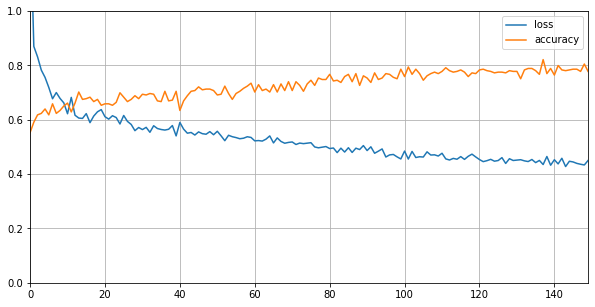

In [95]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

## <font color="red"> Required Coding

In [96]:
### START CODING HERE ###
# evaluate nn_clf model on test_batch using .evaluate method
nn_clf.evaluate(test_batch)
### END CODING HERE ###

93/93 [==============================] - 0s 1ms/step - loss: 0.7706 - accuracy: 0.6667


[0.7706061360008153, 0.6666667]

In [97]:
nn_clf.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                200       
_________________________________________________________________
dense_19 (Dense)             (None, 12)                252       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 13        
Total params: 465
Trainable params: 465
Non-trainable params: 0
_________________________________________________________________


> Now, let's plot ROC curve for this neural network model. Recall from Assignment-3 that you need to get class probabilities, fpr and tpr. To get class probabilities, keras has `predict()` method. Notice that it's applied on `X_test` not `test_batch`. Alternatively, you can use `predict_proba()` method, similar to sklearn, which would generate identical results.

In [98]:
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()

In [99]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

array([0.406647  , 0.47285515, 0.56280774, 0.3635853 , 0.44810745],
      dtype=float32)

## <font color="red"> Required Coding

Text(0.5, 0, 'False Positive Rate')

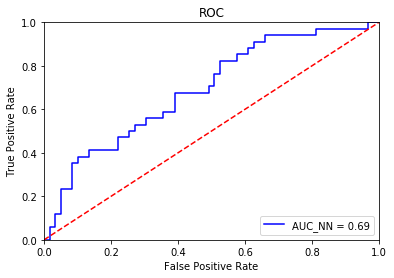

In [100]:
### START CODING HERE ### 
# Plot ROC curve for nn_clf - Write as many lines of code as needed

# Hint: check back your Assignment-3 code, you need to calculate tpr, fpr, thresholds
# Plot should have all the elements that Assignment-3 ROC curves had, title, xlabel and ylabel, xlim & ylim
# Plot should also have AUC_NN (roc_auc) shown on lower right
nn_fpr, nn_tpr, nn_threshold = metrics.roc_curve(y_test, nn_preds)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)
plt.title('ROC')
plt.plot(nn_fpr, nn_tpr, 'b', label = 'AUC_NN = %0.2f' % nn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
### END CODING HERE ###

## Part I - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b><br>

Q1 - If this problem was a multi-class classification, what activation function would you use for the output layer neurons? How many neurons would be required for the output layer? What other hyperparameters of nn can you change? Name at least 3 other hyperparameters. GIVE COMPLETE ANSWER!

If this were a multi-class classification, the output layer would use Softmax as the activation function. A neuron would be required for each class in the classification. Other hyperparameters of the nn are learning rate, batch size, and the number of hidden layers & the number of neurons in those layers.

Q2 - Change the batch number from 1 to 5. Would it improve or hurt the results? Make an argument with reasoning on your observation.

It would improve the results. A larger batch size is less prone to fluctuation, and the larger batch size will train the model faster because it updates the weights less frequently.

## Part II - Regression with NNs

In this part, you will create a neural network to do a regression task.

[Download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/blob/master/Assignment-4/auto.csv). This is cars dataset. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The goal is predicting MPG based on other features.

In [47]:
auto_data = pd.read_csv('auto.csv')
print(auto_data.shape)
auto_data.head()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [48]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## <font color="red"> Required Coding

In [49]:
### START CODING HERE ### 
# Drop all na's using dataframe .dropna(inplace=True) method ~ 1 line
auto_data.dropna(inplace=True)
### END CODING HERE ###
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

For some datasets like this, a technique in data preprocessing is used to encode categorical features to encoded dummy variables. Here, we convert <b>Origin</b> (which looks numeric but is actually categorical) using pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. This technique is one example of One Hot Encoding of categorical features.

In [50]:
auto_data['Origin'] = auto_data['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
auto_data = pd.get_dummies(auto_data, prefix='', prefix_sep='')
print(auto_data.shape)
auto_data.head()

(392, 10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## <font color="red"> Required Coding

In [51]:
### START CODING HERE ### 
# Create X and y, X should not contain MPG column and y should only contain MPG column
# Hint: You can use dataframe .pop() method, but you may need to create a deep copy of the dataframe first
# There are usually multiple ways of doing these operations in pnadas dataframes
X = auto_data.drop(columns='MPG')
y = auto_data['MPG']
### END CODING HERE ###
print(X.shape)
print(y.shape)
X.head()

(392, 9)
(392,)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1


> <b>Note:</b> auto_data should remain the same and should still include MPG

In [52]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


>Normalization is a good pratice when you work with values with different ranges.

In [53]:
# Normalize X 
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(392, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.457538,-0.501749,0.773608
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.457538,-0.501749,0.773608
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.457538,-0.501749,0.773608


## <font color="red"> Required Coding

In [54]:
### START CODING HERE ###
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [55]:
### START CODING HERE ### 
# Build a neural network for regression
nn_reg1 = tf.keras.Sequential([
    # Create a dense layer with 64 neurons, 'relu' activation function and input_shape=[len(X_train.keys())]
    tf.keras.layers.Dense(64, input_shape=[len(X_train.keys())], activation='relu'),
    # Create a dense layer with 64 neurons and 'relu' activation function
    tf.keras.layers.Dense(64, activation='relu'),
    # Create a dense layer with ? neuron(s) and ? activation
    # YOU should decide how many neuron(s) is/are needed and what activation function (if any) to use for output
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1, activation='linear')
    ])
### END CODING HERE ###

In [56]:
# This is another way of defining the optimizer, you can pass learning_rate and other hyperparameters to it.
optimizer = tf.keras.optimizers.RMSprop(0.001)

### START CODING HERE ### 
# Compile nn_reg1 with 'mse' loss, optimizer=optimizer, metrics=['mae', 'mse']
nn_reg1.compile(optimizer=optimizer, loss='mse', metrics=['mae','mse'])
### END CODING HERE ###

In [57]:
nn_reg1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## <font color="red"> Required Coding

In [58]:
EPOCHS = 1000

### START CODING HERE ### 
# fit nn_reg1 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1
nn_reg1_history = nn_reg1.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1)
### END CODING HERE ###

Train on 250 samples, validate on 63 samples
Epoch 1/1000
250/250 [==============================] - 0s 453us/sample - loss: 566.0940 - mae: 22.4268 - mse: 566.0941 - val_loss: 610.8904 - val_mae: 23.4859 - val_mse: 610.8904
Epoch 2/1000
250/250 [==============================] - 0s 40us/sample - loss: 507.3257 - mae: 21.1478 - mse: 507.3257 - val_loss: 551.8893 - val_mae: 22.2396 - val_mse: 551.8893
Epoch 3/1000
250/250 [==============================] - 0s 36us/sample - loss: 451.8542 - mae: 19.8501 - mse: 451.8542 - val_loss: 490.6105 - val_mae: 20.8766 - val_mse: 490.6105
Epoch 4/1000
250/250 [==============================] - 0s 40us/sample - loss: 394.0846 - mae: 18.3996 - mse: 394.0846 - val_loss: 426.7193 - val_mae: 19.3505 - val_mse: 426.7193
Epoch 5/1000
250/250 [==============================] - 0s 44us/sample - loss: 333.5093 - mae: 16.7791 - mse: 333.5093 - val_loss: 359.0054 - val_mae: 17.5931 - val_mse: 359.0055
Epoch 6/1000
250/250 [==============================] - 0s 

250/250 [==============================] - 0s 48us/sample - loss: 6.5091 - mae: 1.8095 - mse: 6.5091 - val_loss: 6.3793 - val_mae: 1.8544 - val_mse: 6.3793
Epoch 96/1000
250/250 [==============================] - 0s 40us/sample - loss: 6.1122 - mae: 1.7709 - mse: 6.1122 - val_loss: 7.2545 - val_mae: 1.9658 - val_mse: 7.2545
Epoch 97/1000
250/250 [==============================] - 0s 40us/sample - loss: 6.2498 - mae: 1.7571 - mse: 6.2498 - val_loss: 6.1039 - val_mae: 1.7964 - val_mse: 6.1039
Epoch 98/1000
250/250 [==============================] - 0s 60us/sample - loss: 6.4042 - mae: 1.8179 - mse: 6.4042 - val_loss: 6.4096 - val_mae: 1.8658 - val_mse: 6.4096
Epoch 99/1000
250/250 [==============================] - 0s 52us/sample - loss: 6.3416 - mae: 1.7748 - mse: 6.3416 - val_loss: 6.8491 - val_mae: 1.9178 - val_mse: 6.8491
Epoch 100/1000
250/250 [==============================] - 0s 52us/sample - loss: 6.2018 - mae: 1.7502 - mse: 6.2018 - val_loss: 6.5179 - val_mae: 1.8639 - val_mse: 

250/250 [==============================] - 0s 44us/sample - loss: 5.9903 - mae: 1.7420 - mse: 5.9903 - val_loss: 6.6864 - val_mae: 1.8512 - val_mse: 6.6864
Epoch 144/1000
250/250 [==============================] - 0s 60us/sample - loss: 5.7697 - mae: 1.7112 - mse: 5.7697 - val_loss: 6.3303 - val_mae: 1.8140 - val_mse: 6.3303
Epoch 145/1000
250/250 [==============================] - 0s 68us/sample - loss: 5.8138 - mae: 1.7189 - mse: 5.8138 - val_loss: 5.8005 - val_mae: 1.7510 - val_mse: 5.8005
Epoch 146/1000
250/250 [==============================] - 0s 60us/sample - loss: 5.7379 - mae: 1.7248 - mse: 5.7379 - val_loss: 6.8930 - val_mae: 1.9108 - val_mse: 6.8930
Epoch 147/1000
250/250 [==============================] - 0s 84us/sample - loss: 5.8189 - mae: 1.7195 - mse: 5.8189 - val_loss: 6.3441 - val_mae: 1.8399 - val_mse: 6.3441
Epoch 148/1000
250/250 [==============================] - 0s 44us/sample - loss: 5.7111 - mae: 1.7053 - mse: 5.7111 - val_loss: 7.5093 - val_mae: 1.9861 - val_m

Epoch 191/1000
250/250 [==============================] - 0s 40us/sample - loss: 5.5207 - mae: 1.6745 - mse: 5.5207 - val_loss: 5.6533 - val_mae: 1.7092 - val_mse: 5.6533
Epoch 192/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.4071 - mae: 1.6439 - mse: 5.4071 - val_loss: 6.2799 - val_mae: 1.8135 - val_mse: 6.2799
Epoch 193/1000
250/250 [==============================] - ETA: 0s - loss: 2.6088 - mae: 1.2484 - mse: 2.608 - 0s 48us/sample - loss: 5.7029 - mae: 1.6733 - mse: 5.7029 - val_loss: 6.0701 - val_mae: 1.7912 - val_mse: 6.0701
Epoch 194/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.4030 - mae: 1.6528 - mse: 5.4030 - val_loss: 6.7349 - val_mae: 1.8905 - val_mse: 6.7349
Epoch 195/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.3709 - mae: 1.6489 - mse: 5.3709 - val_loss: 6.3374 - val_mae: 1.8250 - val_mse: 6.3374
Epoch 196/1000
250/250 [==============================] - 0s 48us/sample - loss: 5.3915 - mae

Epoch 286/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.9777 - mae: 1.5909 - mse: 4.9777 - val_loss: 7.2854 - val_mae: 1.8612 - val_mse: 7.2854
Epoch 287/1000
250/250 [==============================] - 0s 72us/sample - loss: 4.7714 - mae: 1.5156 - mse: 4.7714 - val_loss: 7.3645 - val_mae: 1.8933 - val_mse: 7.3645
Epoch 288/1000
250/250 [==============================] - 0s 104us/sample - loss: 4.9082 - mae: 1.5536 - mse: 4.9082 - val_loss: 6.9259 - val_mae: 1.8404 - val_mse: 6.9259
Epoch 289/1000
250/250 [==============================] - 0s 100us/sample - loss: 4.9473 - mae: 1.5401 - mse: 4.9473 - val_loss: 7.1888 - val_mae: 1.8697 - val_mse: 7.1888
Epoch 290/1000
250/250 [==============================] - 0s 76us/sample - loss: 4.8516 - mae: 1.5500 - mse: 4.8516 - val_loss: 7.2712 - val_mae: 1.8595 - val_mse: 7.2712
Epoch 291/1000
250/250 [==============================] - 0s 72us/sample - loss: 4.8152 - mae: 1.5306 - mse: 4.8152 - val_loss: 6.3665 - val_ma

Epoch 334/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.5715 - mae: 1.4858 - mse: 4.5715 - val_loss: 7.2544 - val_mae: 1.8529 - val_mse: 7.2544
Epoch 335/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.7164 - mae: 1.5075 - mse: 4.7164 - val_loss: 7.3607 - val_mae: 1.8834 - val_mse: 7.3607
Epoch 336/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.5939 - mae: 1.4825 - mse: 4.5939 - val_loss: 6.5770 - val_mae: 1.8008 - val_mse: 6.5770
Epoch 337/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.6410 - mae: 1.4824 - mse: 4.6410 - val_loss: 6.6558 - val_mae: 1.8228 - val_mse: 6.6558
Epoch 338/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.3857 - mae: 1.4450 - mse: 4.3857 - val_loss: 8.1433 - val_mae: 1.9863 - val_mse: 8.1433
Epoch 339/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.4276 - mae: 1.4301 - mse: 4.4276 - val_loss: 6.6803 - val_mae:

Epoch 382/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.6090 - mae: 1.4649 - mse: 4.6090 - val_loss: 6.5205 - val_mae: 1.8448 - val_mse: 6.5205
Epoch 383/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.2754 - mae: 1.4396 - mse: 4.2754 - val_loss: 7.0666 - val_mae: 1.8605 - val_mse: 7.0666
Epoch 384/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.4204 - mae: 1.4852 - mse: 4.4204 - val_loss: 7.9146 - val_mae: 1.9888 - val_mse: 7.9146
Epoch 385/1000
250/250 [==============================] - 0s 56us/sample - loss: 4.2984 - mae: 1.3946 - mse: 4.2984 - val_loss: 7.7228 - val_mae: 1.9448 - val_mse: 7.7228
Epoch 386/1000
250/250 [==============================] - 0s 44us/sample - loss: 4.2257 - mae: 1.4081 - mse: 4.2257 - val_loss: 7.4144 - val_mae: 1.8890 - val_mse: 7.4144
Epoch 387/1000
250/250 [==============================] - 0s 56us/sample - loss: 4.3711 - mae: 1.4420 - mse: 4.3711 - val_loss: 7.4323 - val_mae:

Epoch 430/1000
250/250 [==============================] - 0s 64us/sample - loss: 4.2149 - mae: 1.3788 - mse: 4.2149 - val_loss: 6.8916 - val_mae: 1.8630 - val_mse: 6.8916
Epoch 431/1000
250/250 [==============================] - 0s 40us/sample - loss: 4.0518 - mae: 1.3681 - mse: 4.0518 - val_loss: 8.3731 - val_mae: 2.0061 - val_mse: 8.3731
Epoch 432/1000
250/250 [==============================] - 0s 48us/sample - loss: 4.0833 - mae: 1.3573 - mse: 4.0833 - val_loss: 7.4381 - val_mae: 1.8885 - val_mse: 7.4381
Epoch 433/1000
250/250 [==============================] - 0s 52us/sample - loss: 4.1991 - mae: 1.4017 - mse: 4.1991 - val_loss: 7.2121 - val_mae: 1.8703 - val_mse: 7.2121
Epoch 434/1000
250/250 [==============================] - 0s 56us/sample - loss: 4.1232 - mae: 1.3596 - mse: 4.1232 - val_loss: 7.4514 - val_mae: 1.9082 - val_mse: 7.4514
Epoch 435/1000
250/250 [==============================] - 0s 60us/sample - loss: 4.0676 - mae: 1.3842 - mse: 4.0676 - val_loss: 7.2936 - val_mae:

Epoch 478/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.8912 - mae: 1.2954 - mse: 3.8912 - val_loss: 7.7546 - val_mae: 1.9377 - val_mse: 7.7546
Epoch 479/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.9053 - mae: 1.3185 - mse: 3.9053 - val_loss: 7.5180 - val_mae: 1.9220 - val_mse: 7.5180
Epoch 480/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.9180 - mae: 1.3380 - mse: 3.9180 - val_loss: 7.9348 - val_mae: 1.9577 - val_mse: 7.9348
Epoch 481/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.7974 - mae: 1.3032 - mse: 3.7974 - val_loss: 8.0538 - val_mae: 1.9933 - val_mse: 8.0538
Epoch 482/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.8043 - mae: 1.3192 - mse: 3.8043 - val_loss: 8.0789 - val_mae: 1.9665 - val_mse: 8.0789
Epoch 483/1000
250/250 [==============================] - 0s 36us/sample - loss: 4.0969 - mae: 1.3349 - mse: 4.0969 - val_loss: 7.2317 - val_mae:

Epoch 526/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6507 - mae: 1.2516 - mse: 3.6507 - val_loss: 7.4598 - val_mae: 1.9673 - val_mse: 7.4598
Epoch 527/1000
250/250 [==============================] - 0s 60us/sample - loss: 3.6315 - mae: 1.2909 - mse: 3.6315 - val_loss: 8.2505 - val_mae: 2.0487 - val_mse: 8.2505
Epoch 528/1000
250/250 [==============================] - 0s 36us/sample - loss: 3.7140 - mae: 1.2578 - mse: 3.7140 - val_loss: 7.9545 - val_mae: 1.9733 - val_mse: 7.9545
Epoch 529/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.6775 - mae: 1.2655 - mse: 3.6775 - val_loss: 7.7997 - val_mae: 2.0167 - val_mse: 7.7997
Epoch 530/1000
250/250 [==============================] - 0s 140us/sample - loss: 3.8764 - mae: 1.3262 - mse: 3.8764 - val_loss: 8.4641 - val_mae: 2.0311 - val_mse: 8.4641
Epoch 531/1000
250/250 [==============================] - 0s 60us/sample - loss: 3.5616 - mae: 1.2414 - mse: 3.5616 - val_loss: 9.1548 - val_mae

Epoch 574/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.3507 - mae: 1.2071 - mse: 3.3507 - val_loss: 9.0292 - val_mae: 2.1451 - val_mse: 9.0292
Epoch 575/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.3637 - mae: 1.1946 - mse: 3.3637 - val_loss: 7.5168 - val_mae: 1.9732 - val_mse: 7.5168
Epoch 576/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.3777 - mae: 1.2145 - mse: 3.3777 - val_loss: 8.7114 - val_mae: 2.0765 - val_mse: 8.7114
Epoch 577/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.3766 - mae: 1.2541 - mse: 3.3766 - val_loss: 8.4758 - val_mae: 2.1260 - val_mse: 8.4758
Epoch 578/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.4141 - mae: 1.2503 - mse: 3.4141 - val_loss: 11.2370 - val_mae: 2.4046 - val_mse: 11.2370
Epoch 579/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.5618 - mae: 1.2419 - mse: 3.5618 - val_loss: 9.5536 - val_ma

Epoch 622/1000
250/250 [==============================] - 0s 56us/sample - loss: 3.3612 - mae: 1.1767 - mse: 3.3612 - val_loss: 7.9192 - val_mae: 2.0197 - val_mse: 7.9192
Epoch 623/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.3394 - mae: 1.2609 - mse: 3.3394 - val_loss: 9.5409 - val_mae: 2.1916 - val_mse: 9.5409
Epoch 624/1000
250/250 [==============================] - 0s 52us/sample - loss: 3.3684 - mae: 1.1827 - mse: 3.3684 - val_loss: 8.3571 - val_mae: 2.0469 - val_mse: 8.3571
Epoch 625/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.1976 - mae: 1.1821 - mse: 3.1976 - val_loss: 9.6256 - val_mae: 2.2270 - val_mse: 9.6256
Epoch 626/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.3535 - mae: 1.2029 - mse: 3.3535 - val_loss: 8.5169 - val_mae: 2.1174 - val_mse: 8.5169
Epoch 627/1000
250/250 [==============================] - 0s 48us/sample - loss: 3.3065 - mae: 1.1952 - mse: 3.3065 - val_loss: 8.7424 - val_mae:

Epoch 670/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.0126 - mae: 1.1165 - mse: 3.0126 - val_loss: 9.4796 - val_mae: 2.2378 - val_mse: 9.4796
Epoch 671/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.1018 - mae: 1.1634 - mse: 3.1018 - val_loss: 7.5702 - val_mae: 2.0012 - val_mse: 7.5702
Epoch 672/1000
250/250 [==============================] - 0s 40us/sample - loss: 3.1455 - mae: 1.1941 - mse: 3.1455 - val_loss: 8.7296 - val_mae: 2.1057 - val_mse: 8.7296
Epoch 673/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.0823 - mae: 1.1490 - mse: 3.0823 - val_loss: 7.7183 - val_mae: 2.0267 - val_mse: 7.7183
Epoch 674/1000
250/250 [==============================] - 0s 44us/sample - loss: 2.9977 - mae: 1.1579 - mse: 2.9977 - val_loss: 9.7038 - val_mae: 2.2324 - val_mse: 9.7038
Epoch 675/1000
250/250 [==============================] - 0s 44us/sample - loss: 3.1799 - mae: 1.1353 - mse: 3.1799 - val_loss: 8.9505 - val_mae:

Epoch 765/1000
250/250 [==============================] - 0s 36us/sample - loss: 2.8694 - mae: 1.1446 - mse: 2.8694 - val_loss: 8.5147 - val_mae: 2.0970 - val_mse: 8.5147
Epoch 766/1000
250/250 [==============================] - 0s 40us/sample - loss: 2.9871 - mae: 1.0792 - mse: 2.9871 - val_loss: 8.4711 - val_mae: 2.1029 - val_mse: 8.4711
Epoch 767/1000
250/250 [==============================] - 0s 56us/sample - loss: 2.8371 - mae: 1.0982 - mse: 2.8371 - val_loss: 10.5327 - val_mae: 2.3583 - val_mse: 10.5327
Epoch 768/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.9660 - mae: 1.1150 - mse: 2.9660 - val_loss: 10.0822 - val_mae: 2.3054 - val_mse: 10.0822
Epoch 769/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.9005 - mae: 1.0973 - mse: 2.9005 - val_loss: 8.5235 - val_mae: 2.1137 - val_mse: 8.5235
Epoch 770/1000
250/250 [==============================] - 0s 56us/sample - loss: 2.9315 - mae: 1.1094 - mse: 2.9315 - val_loss: 9.0919 - val_

Epoch 860/1000
250/250 [==============================] - 0s 48us/sample - loss: 2.8776 - mae: 1.1180 - mse: 2.8776 - val_loss: 8.8205 - val_mae: 2.2273 - val_mse: 8.8205
Epoch 861/1000
250/250 [==============================] - 0s 48us/sample - loss: 2.5800 - mae: 1.0166 - mse: 2.5800 - val_loss: 9.0632 - val_mae: 2.2234 - val_mse: 9.0632
Epoch 862/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.8043 - mae: 1.0726 - mse: 2.8043 - val_loss: 8.3476 - val_mae: 2.1275 - val_mse: 8.3476
Epoch 863/1000
250/250 [==============================] - 0s 60us/sample - loss: 2.5817 - mae: 1.0356 - mse: 2.5817 - val_loss: 7.7791 - val_mae: 2.0856 - val_mse: 7.7791
Epoch 864/1000
250/250 [==============================] - 0s 60us/sample - loss: 2.7570 - mae: 1.0810 - mse: 2.7570 - val_loss: 8.4331 - val_mae: 2.1612 - val_mse: 8.4331
Epoch 865/1000
250/250 [==============================] - 0s 56us/sample - loss: 2.7354 - mae: 1.0587 - mse: 2.7354 - val_loss: 8.0373 - val_mae:

Epoch 908/1000
250/250 [==============================] - 0s 45us/sample - loss: 2.6105 - mae: 1.0478 - mse: 2.6105 - val_loss: 7.8207 - val_mae: 2.1038 - val_mse: 7.8207
Epoch 909/1000
250/250 [==============================] - 0s 40us/sample - loss: 2.8109 - mae: 1.0895 - mse: 2.8109 - val_loss: 9.5219 - val_mae: 2.2826 - val_mse: 9.5219
Epoch 910/1000
250/250 [==============================] - 0s 56us/sample - loss: 2.5948 - mae: 1.0137 - mse: 2.5948 - val_loss: 7.8637 - val_mae: 2.0906 - val_mse: 7.8637
Epoch 911/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.6722 - mae: 1.0354 - mse: 2.6722 - val_loss: 8.3738 - val_mae: 2.1614 - val_mse: 8.3738
Epoch 912/1000
250/250 [==============================] - 0s 48us/sample - loss: 2.5974 - mae: 1.0517 - mse: 2.5974 - val_loss: 9.1740 - val_mae: 2.2463 - val_mse: 9.1740
Epoch 913/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.6000 - mae: 1.0431 - mse: 2.6000 - val_loss: 8.1176 - val_mae:

Epoch 956/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.4392 - mae: 0.9907 - mse: 2.4392 - val_loss: 8.2577 - val_mae: 2.1596 - val_mse: 8.2577
Epoch 957/1000
250/250 [==============================] - 0s 48us/sample - loss: 2.5360 - mae: 0.9830 - mse: 2.5360 - val_loss: 9.9088 - val_mae: 2.3177 - val_mse: 9.9088
Epoch 958/1000
250/250 [==============================] - 0s 51us/sample - loss: 2.4686 - mae: 1.0058 - mse: 2.4686 - val_loss: 8.2732 - val_mae: 2.1306 - val_mse: 8.2732
Epoch 959/1000
250/250 [==============================] - 0s 52us/sample - loss: 2.5208 - mae: 1.0115 - mse: 2.5208 - val_loss: 7.8167 - val_mae: 2.0676 - val_mse: 7.8167
Epoch 960/1000
250/250 [==============================] - 0s 44us/sample - loss: 2.4720 - mae: 0.9858 - mse: 2.4720 - val_loss: 9.0133 - val_mae: 2.2285 - val_mse: 9.0133
Epoch 961/1000
250/250 [==============================] - 0s 48us/sample - loss: 2.5175 - mae: 0.9853 - mse: 2.5175 - val_loss: 9.1069 - val_mae:

In [59]:
# Your numbers might be a little different!
hist1 = pd.DataFrame(nn_reg1_history.history)
hist1['epoch'] = nn_reg1_history.epoch
hist1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.532476,0.978994,2.532477,9.878117,2.395531,9.878117,995
996,2.498936,0.976303,2.498936,8.392112,2.162326,8.392112,996
997,2.338675,0.930852,2.338675,9.120979,2.252194,9.120978,997
998,2.442760,0.970691,2.442760,7.763406,2.131611,7.763406,998
999,2.430886,0.978274,2.430886,8.239401,2.136493,8.239401,999


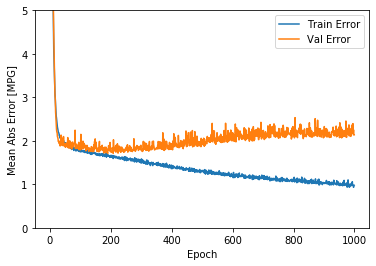

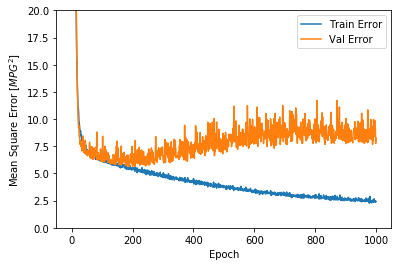

In [60]:
# Your plots might be slightly different but should look very similar!
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(nn_reg1_history)

> Based on the above plots, it looks like that there is not too much improvement after around 100 epochs. Let's rebuild the model and update `nn_reg2.fit` call to automatically stop training when the validation loss doesn't improve. As discussed in the lectures, you can use an `EarlyStopping` callback that checks a training condition for every epoch. If a preset number of epochs elapses without much improvement, it automatically stops the training.

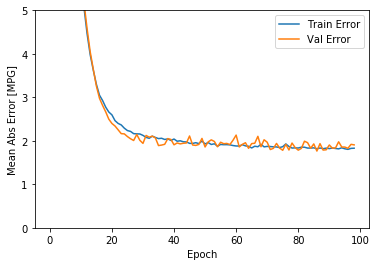

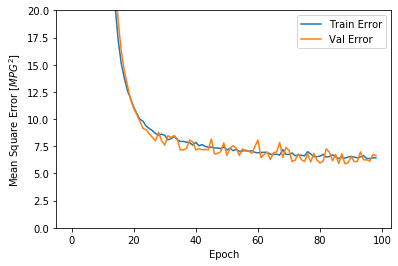

In [61]:
### START CODING HERE ### 
# Build another regression neural network with the same architecture and compile it with the same hyperparameters
nn_reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=[len(X_train.keys())], activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
    ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

# Compile the model using the same hyperparameters as nn_reg1
nn_reg2.compile(optimizer=optimizer, loss='mse', metrics=['mae','mse'])

# Create a tf.keras.callbacks with EarlyStopping method and monitor='val_loss' and patience=10 parameters ~ 1 line
# Hint: The patience parameter is the number of epochs to check for improvement
# You may want to look up textbook examples to remind yourself how to do this!
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Fit nn_reg2 on X_train, y_train, epochs=EPOCHS, valisation_split=0.2, verbose=0, callbacks=[early_stop]
nn_reg2_history = nn_reg2.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop])
### END CODING HERE ###

plot_history(nn_reg2_history) # Ignore the warning.
#Your plots might be slightly different but should look very similar.

In [62]:
### START CODING HERE ### 
# Evaluate nn_reg2 using .evaluate() method on X_test, y_test and verbose=2
loss, mae, mse = nn_reg2.evaluate(X_test, y_test, verbose=2)
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

79/79 - 0s - loss: 5.5721 - mae: 1.6917 - mse: 5.5721
Testing set Mean Abs Error:  1.69 MPG


> You can check the quality of the model predictions by the following plots. Use these plots to answer Part II Q1.

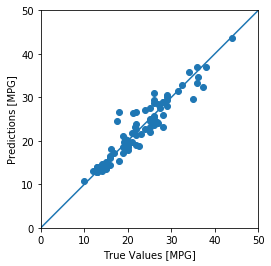

In [63]:
nn_reg2_preds = nn_reg2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, nn_reg2_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

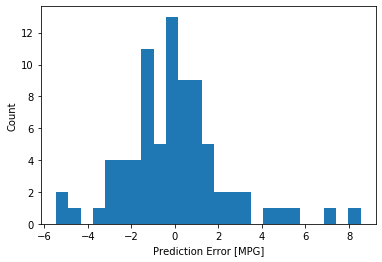

In [64]:
error = nn_reg2_preds - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

## Part II - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b>

Q1- How do you interprete the above plots and the model performance (Predictions vs True Values & the histogram of Prediction Error)? GIVE COMPLETE ANSWER!

The plot of Predicted vs True values is close to a 1:1, and the histogram of Prediction error centered at zero with a fairly narrow peak. These both indicate that the model is performing very well.

Q2 - How do you interprete the first model's plots of mse and mae, i.e. `plot_history(nn_reg1_history)`? What is the impact of choosing `mse` vs `mae`? GIVE COMPLETE ANSWER!

The first model's plots of mse and mae indicate that as the number of Epochs increases, there is diminished improvement to the error. After 100 or so Epochs the error can actually increase as the model overfits. Both MSE and MAE can visualize this, but MSE makes the changes in error more dramatic because they are squared.

Q3 - How do you interprete `plot_history(nn_reg1_history)`? What is the impact of using `EarlyStopping`? GIVE COMPLETE ANSWER!

The plot indicates that training the model beyond 100 Epochs will not increase performance. Early Stopping has the impact of watching when the change in the loss from Epoch to Epoch is below a threshold, and stopping the training if this occurs.

## Optional Part III - <font color=green>Extra Credit</font>

<b>Notice:</b> This part is totally optional and for earning <b><font color=green>extra credit</font></b> in the "Assignment" section of your final grade. Attempt this part only if you have enough time and you're inclined to challenge yourself a bit!

[Download the video games dataset](https://raw.githubusercontent.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/master/Assignment-4/video.csv)<br> 

You can read about the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). <br>

Build a neural network that can predict the "<b>Rating</b>" of each game based on other features. Alternatively, you may predict either the global sales or regional sales (in North America, Europe, etc) for each row/video game. Perform any necessary preprocessing steps needed on the dataset. <br>

You should create a separate notebook for Extra Credit attempt and submit it via a separate link in Blackboard. If you can get good results based on the instructor's judgement of your work, you may earn up to 50 points of extra credit for A4 that can be used for the missing points of "Assignment" section of your final grade.<br>

<b>Note:</b> Extra credits for A4 can only be used to compensate for "Assignment" section NOT on any other sections of the final grade such as quizzes or exams.

In [42]:
video_data = pd.read_csv('video.csv')
print(video_data.shape)
video_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
video_data.dropna(inplace=True)

In [44]:
print(video_data.shape)
video_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Grading

For Assignment 4, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and answer ALL questions COMPLETELY. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 40 points:
- 10 points: preprocessing steps.
- 15 points: nn_clf implementation, and compile.
- 15 points: correct ROC curve for nn_clf.

Part I questions have 10 points (5 points each).

Part II implementaion has 35 points:
- 10 points: preprocessing steps.
- 10 points: nn_reg1 implementation, and compile.
- 15 points: nn_reg2 implementation, and compile (including EarlyStopping).

Part II questions have 15 points (5 points each).

Part III is optional and for Extra Credit only - up to 50 extra points based on the quality of your work.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## How to Submit and Due Date

Name your notebook ```Lastname-A4.ipynb```. Submit the file using the ```Assignment-4``` link on Blackboard.

If you attempt the Extra Credit in Part III, create a separate notebook including all the necessary code, name it `Lastname-A4-EC.ipynb` and submit it using the ```A4-Extra-Credit``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday December 2nd 11:59PM.</b></font>